## Importing Necessary packages

In [126]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt
import numpy as np
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans




## Loading the data

In [127]:
data_path = os.path.join(os.getcwd(), 'data\sales_data_sample.csv')
data = pd.read_csv(data_path, encoding='iso-8859-1')
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])
data.head()

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES   
0        10107               30      95.70                2  2871.00  \
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

   ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...   
0 2003-02-24  Shipped       1         2     2003  ...  \
1 2003-05-07  Shipped       2         5     2003  ...   
2 2003-07-01  Shipped       3         7     2003  ...   
3 2003-08-25  Shipped       3         8     2003  ...   
4 2003-10-10  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE   
0        897 Long Airport Avenue           NaN            NYC    NY  \
1             59 rue de l'Abbaye           NaN          Reims   NaN   
2  27 rue du Colonel Pierre Avia           NaN          Paris   NaN   
3             78934 Hillside Dr.           NaN       Pasadena    CA   
4                7734 Strong St.           NaN  San Francisco    CA   

  POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0      10022     USA       NaN              Yu             Kwai    Small  
1      51100  France      EMEA         Henriot             Paul    Small  
2      75508  France      EMEA        Da Cunha           Daniel   Medium  
3      90003     USA       NaN           Young            Julie   Medium  
4        NaN     USA       NaN           Brown            Julie   Medium  

[5 rows x 25 columns]

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

As can be seen in the above output the columns: ADDRESSLINE2, STATE, POSTALCODE and TERRITORY have null data, but these columns are not defining for the segmentation of the clusters

# EDA

# Univariate analysis

Text(0.5, 1.0, 'Distribution of the price of each solded product')

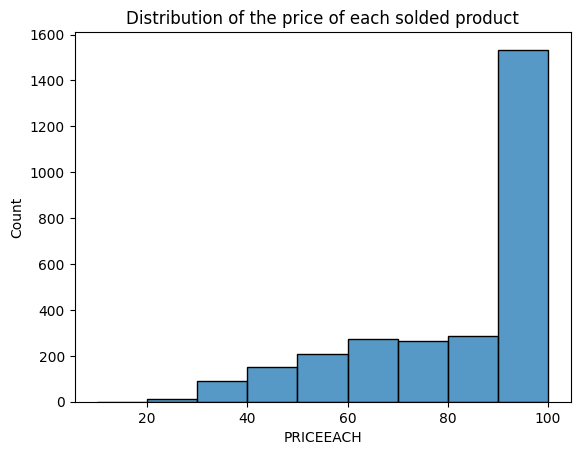

In [129]:
sns.histplot(data=data, x="PRICEEACH", bins=list(range(10,110,10)))
plt.title("Distribution of the price of each solded product")

Text(0.5, 1.0, 'Distribution of the DEALSIZE')

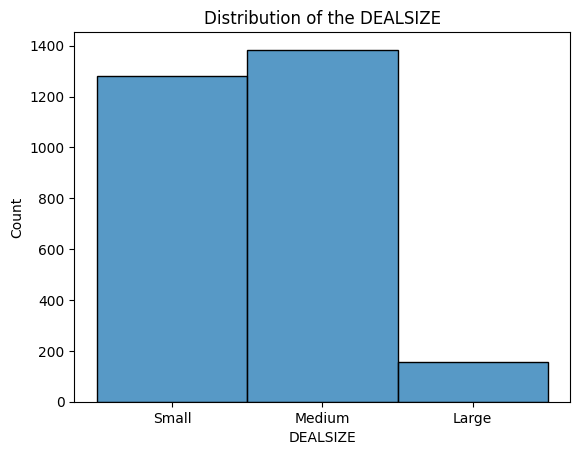

In [130]:
sns.histplot(data=data, x="DEALSIZE")
plt.title("Distribution of the DEALSIZE")


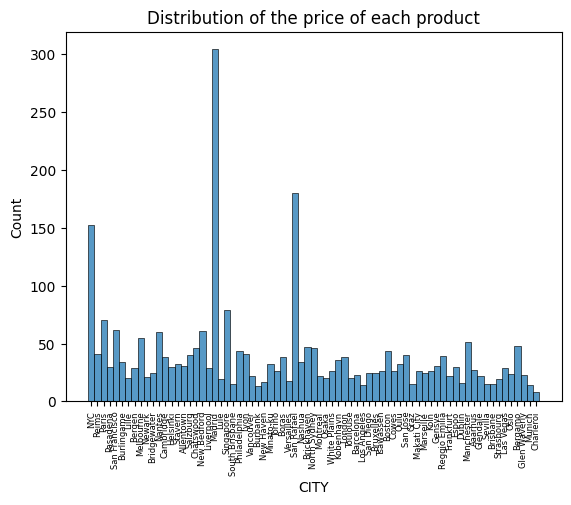

In [131]:
sns.histplot(data=data, x="CITY")
plt.title("Distribution of the price of each product")
plt.xticks(rotation=90, fontsize=6)
plt.show()

# RFM Analysis

As the data is very old, the RFM analysis will work under the assumption that the current date is the date on which the last sale was made.

In [132]:
# rfm_data = data[['CUSTOMERNAME', "ORDERNUMBER", "ORDERDATE", "QUANTITYORDERED", "PRICEEACH", "SALES", "PRODUCTLINE", "CITY", "COUNTRY", "DEALSIZE"]]
# rfm_data

last_order_date:dt.datetime = max(data["ORDERDATE"]) # getting the last order date  
current_date = last_order_date # the assumption that the current date is the date on which the last sale was made.

last_year = current_date - dt.timedelta(days=365)
# print(last_year)

data["RECENCY_days"] = data["ORDERDATE"].copy()
data["FREQUENCY_last_year"] = data["ORDERNUMBER"].copy()
data["MONETARY_last_year"] = data["SALES"].copy()
recency_quantity = data.groupby(by='CUSTOMERNAME').agg({"RECENCY_days": lambda order_dates: (current_date - order_dates.max()).days,
                                                     })

frecuency_monetary_ordered_last_year = data[data["ORDERDATE"] >= last_year].groupby('CUSTOMERNAME').agg({"FREQUENCY_last_year": lambda order_number: len(order_number.unique()),
                                                                                                 "MONETARY_last_year": lambda sales: sales.sum(),
                                                                                                 "QUANTITYORDERED": lambda quantity: int(quantity.sum())})

frecuency_monetary_ordered_last_year.rename(columns={"QUANTITYORDERED":"QUANTITYORDERED_last_year"}, inplace=True)

rfm_data = pd.concat([recency_quantity, frecuency_monetary_ordered_last_year], axis=1)
rfm_data.fillna(0, inplace=True)

# Bivariate Analysis

In [134]:
customers = data["CUSTOMERNAME"].unique().tolist()
print(f"There are {len(customers)} customers")


There are 92 customers
